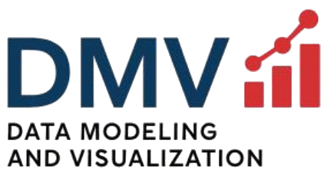

# **Week 4: Distributions, Histograms, Density Plots, Box Plots & Violin Plots**

## **Introduction to Distributions**
What are Distributions and why are they important?

In statistics, a distribution refers to the way in which a dataset is spread out or arranged. It describes the possible values a variable can take and how often those values occur. Understanding the distribution of your data is fundamental because it provides insights into:

*   Central Tendency: Where the data is centered (e.g., mean, median, mode).
*   Spread/Variability: How dispersed the data points are (e.g., range, variance, standard deviation).
*   Shape: Whether the data is symmetric, skewed, or has multiple peaks.
*   Outliers: Unusual data points that deviate significantly from the rest of the data.

By visualizing distributions, we can quickly grasp these characteristics and identify patterns, anomalies, or potential issues in our data before performing more complex analyses.
### **Types of Distributions**

There are many types of distributions, each with unique properties. Some common ones include:

*   Normal (Gaussian) Distribution: Bell-shaped and symmetric, with most values clustered around the mean. Many natural phenomena follow a normal distribution.
*   Skewed Distributions:
    *   Right-skewed (Positive Skew): The tail of the distribution extends to the right, meaning there are more values on the lower end and a few very high values.
    *   Left-skewed (Negative Skew): The tail extends to the left, indicating more values on the higher end and a few very low values.
*   Uniform Distribution: All values within a given range have an equal probability of occurring.
*   Bimodal/Multimodal Distribution: The distribution has two or more distinct peaks, suggesting the presence of multiple underlying groups or processes.

**Now, let's install & import the necessary libraries and load the dataset**

In [20]:
try: # Import the package if already installed
    import matplotlib.pyplot as plt
except: # Otherwise install the package first and then import
    !pip install matplotlib
    import matplotlib.pyplot as plt
try:
    import numpy as np
except:
    !pip install numpy
    import numpy as np
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd
try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
try:
    import plotnine as p9
except:
    !pip install plotnine
    import plotnine as p9

# For using files stored in Google Drive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# Now include the file path
folder_path = 'drive/MyDrive/DA209_DMV/'
file_name = 'tips.csv' #Change the file name as per the requirements

# Load the data:
tips = pd.read_csv(folder_path+file_name) #Replace desired_dataframe with a valid variable name

# Check if the data is loaded correctly
tips.head() #Replace desired_dataframe with a valid variable name

Mounted at /content/drive


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## How is the distribution of 'total bill'?

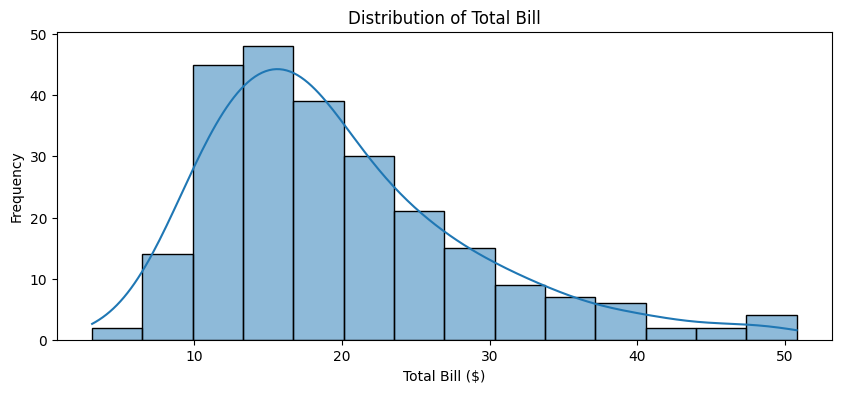

In [21]:
# Let's look at the distribution of 'total_bill'
plt.figure(figsize=(10, 4))
sns.histplot(tips['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.show()

## And how is the distribution of 'tip'?

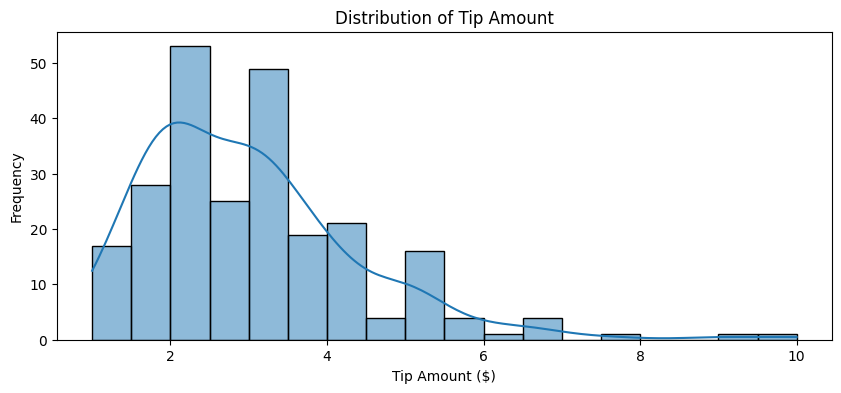

In [22]:
# Let's look at the distribution of 'tip'
plt.figure(figsize=(10, 4))
sns.histplot(tips['tip'], kde=True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.show()

From the above plots, we can already observe some characteristics. The total_bill distribution appears slightly right-skewed, while the tip distribution also shows a similar pattern, with a concentration of lower tip amounts and a tail extending towards higher tips.

# **1. Histograms**
Purpose and Construction of Histograms

A histogram is a graphical representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable. To construct a histogram:

1.  Divide the data into "bins" (intervals): The entire range of values of the variable is divided into a series of continuous intervals.
2.  Count the frequency: For each bin, the number of data points that fall into that bin is counted.
3.  Plot bars: A bar is drawn for each bin, where the height of the bar represents the frequency (or proportion) of data points in that bin.

Histograms are excellent for quickly visualizing the shape, center, and spread of a distribution, as well as identifying potential outliers or multiple modes.

Let's create a histogram for the `total_bill` column.

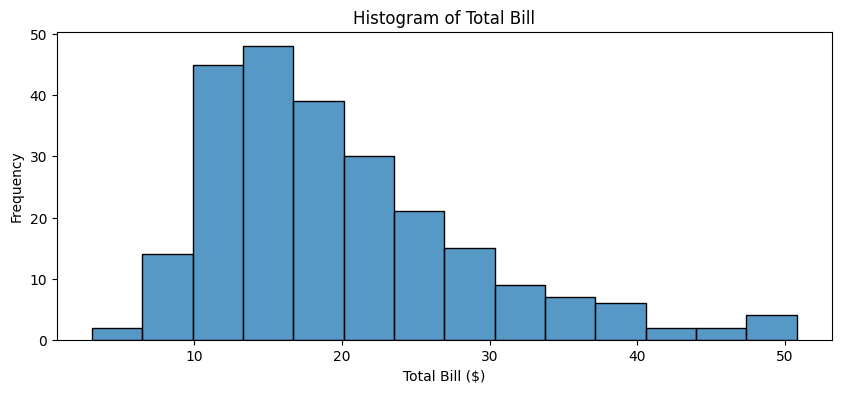

In [23]:
# Histogram of 'total_bill'
plt.figure(figsize=(10, 4))
sns.histplot(tips['total_bill'])
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.show()

From our total_bill histogram, we can see it's somewhat right-skewed, indicating that most total bills are on the lower side, with fewer very high bills.

## **Variants of Histograms**
### **Stacked Histograms**

Stacked histograms are useful when you want to see the distribution of a numerical variable broken down by categories within a categorical variable. Each bar is segmented to show the contribution of each category.

Let's visualize the distribution of `total_bill` broken down by `sex` (gender).

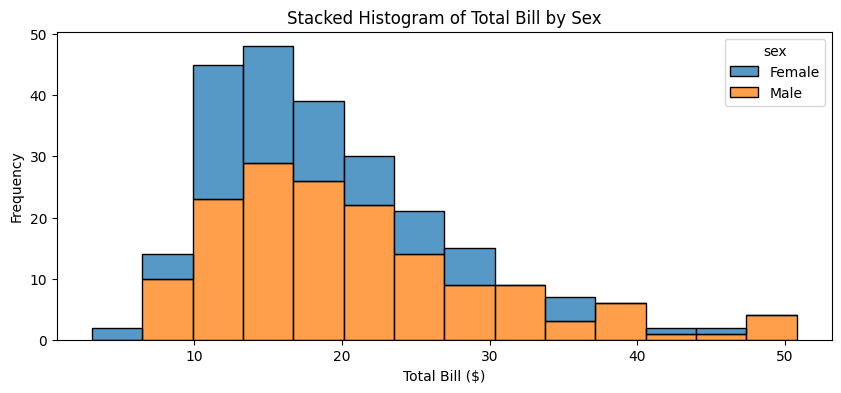

In [5]:
# Stacked Histogram of 'total_bill' by 'sex'
plt.figure(figsize=(10, 4))
sns.histplot(data=tips, x='total_bill', hue='sex', multiple='stack')
plt.title('Stacked Histogram of Total Bill by Sex')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.show()

This stacked histogram shows the distribution of total bills for males and females. We can observe that males tend to have a higher frequency of larger bills compared to females, although both distributions are right-skewed.

### **Overlaid Histograms (Dodged)**

Overlaid (or dodged) histograms display the distributions of different categories side-by-side, allowing for easier comparison of their shapes and positions.

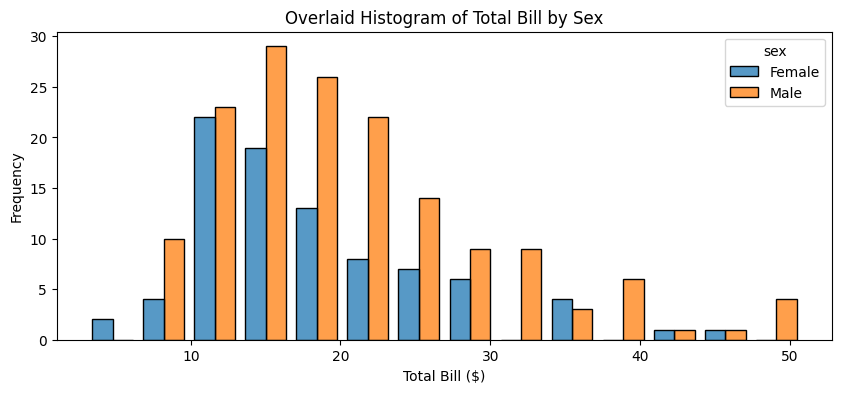

In [24]:
# Overlaid (Dodged) Histogram of 'total_bill' by 'sex'
plt.figure(figsize=(10, 4))
sns.histplot(data=tips, x='total_bill', hue='sex', multiple='dodge', shrink=.8)
plt.title('Overlaid Histogram of Total Bill by Sex')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.show()

In the overlaid histogram, it's easier to compare the peaks and spreads of the `total_bill` for males and females directly. Males appear to have a slightly wider range of total bills.

## **Effect of Bin Width**
The choice of bin width (or number of bins) significantly impacts the appearance and interpretation of a histogram.

*   **Too few bins (large bin width)**: Can obscure important details and make the distribution appear more uniform than it is.
*   **Too many bins (small bin width)**: Can make the histogram look noisy and jagged, highlighting random fluctuations rather than the underlying shape.

Let's demonstrate this effect with the total_bill column.

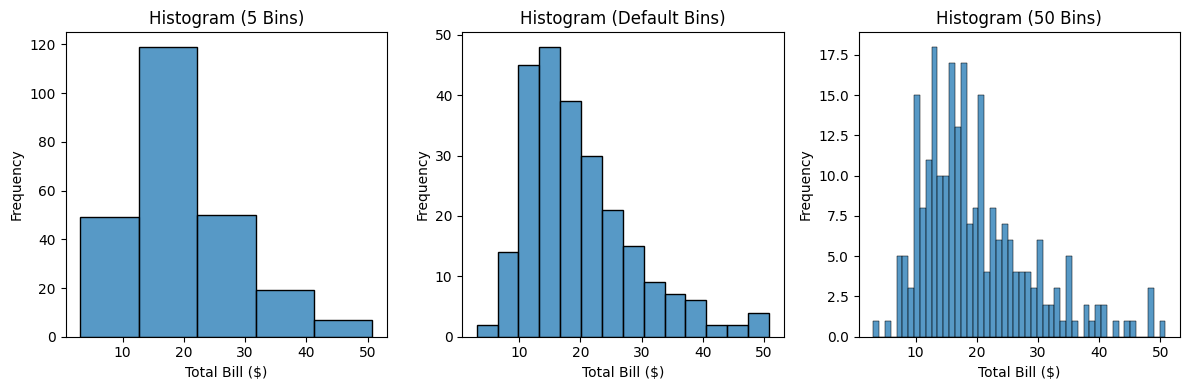

In [7]:
# Effect of Bin Width on Histograms

# Histogram with few bins
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(tips['total_bill'], bins=5)
plt.title('Histogram (5 Bins)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')

# Histogram with a moderate number of bins (default by seaborn is usually good)
plt.subplot(1, 3, 2)
sns.histplot(tips['total_bill']) # Default bins
plt.title('Histogram (Default Bins)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')

# Histogram with many bins
plt.subplot(1, 3, 3)
sns.histplot(tips['total_bill'], bins=50)
plt.title('Histogram (50 Bins)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As you can see:

*   With 5 bins, the histogram is very coarse and hides the right-skewness.
*   With the default bins (often determined by algorithms like Freedman-Diaconis rule or Scott's rule in seaborn), the shape of the distribution is clearer, revealing the right-skewness.
*   With 50 bins, the histogram becomes very jagged, and it's harder to discern the overall shape due to the noise introduced by small fluctuations.

The goal is to choose a bin width that reveals the underlying structure of the data without over-smoothing or introducing too much noise.

**Limitations of Histograms**

While histograms are powerful, they have some limitations:

*   **Binning dependency**: As we just saw, the appearance of a histogram can change significantly with different bin widths, making it subjective.
*   **Discreteness**: Histograms represent continuous data in discrete bins, which can sometimes misrepresent the smoothness of the underlying distribution.
*   **Difficulty in comparing multiple distributions**: Overlapping or stacked histograms can sometimes be hard to interpret when comparing many distributions.

# **2. Density Plots (KDE Plots)**

**Kernel Density Estimation (KDE) plots**, often simply called density plots, address some of the limitations of histograms. Instead of discrete bars, KDE plots produce a smooth, continuous curve that represents the estimated probability density function of the data.

How does KDE work?

*   **Kernels**: For each data point, a "kernel" (a small probability distribution, typically a Gaussian/normal distribution) is placed.
*   **Summing Kernels**: These individual kernel functions are then summed up to create a smooth, continuous curve that approximates the underlying distribution of the data.
*   **Normalization**: The area under the curve is normalized to 1, just like a probability density function.

KDE plots are particularly useful for:

*   Visualizing the shape of distributions without the arbitrary binning of histograms.
*   Comparing multiple distributions more easily.
*   Identifying subtle patterns or modes that might be missed in histograms.

Let's create a KDE plot for `total_bill`.

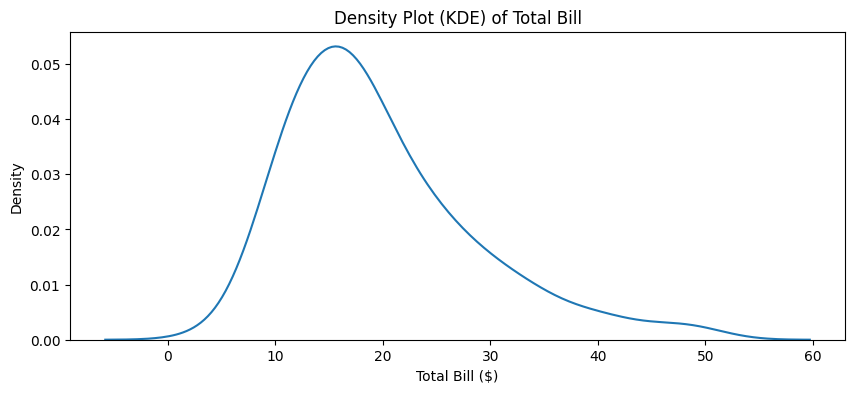

In [26]:
# KDE Plot of 'total_bill'
plt.figure(figsize=(10, 4))
sns.kdeplot(tips['total_bill'], fill=False)
plt.title('Density Plot (KDE) of Total Bill')
plt.xlabel('Total Bill ($)')
plt.ylabel('Density')
plt.show()

Compare this to the histogram of `total_bill`. The KDE plot provides a smoother representation of the distribution, clearly showing the peak and the right-skewed tail without the jagginess of bins.

**Bandwidth Effects**

Just as bin width is crucial for histograms, bandwidth is the most important parameter for KDE plots. Bandwidth controls the smoothness of the estimated density curve:

*   **Small bandwidth**: Leads to a more sensitive and "wiggly" curve that might show more detail but also more noise, potentially overfitting the data.
*   **Large bandwidth**: Leads to a smoother curve that might over-generalize and obscure important features or multiple modes.

Let's illustrate the effect of bandwidth:

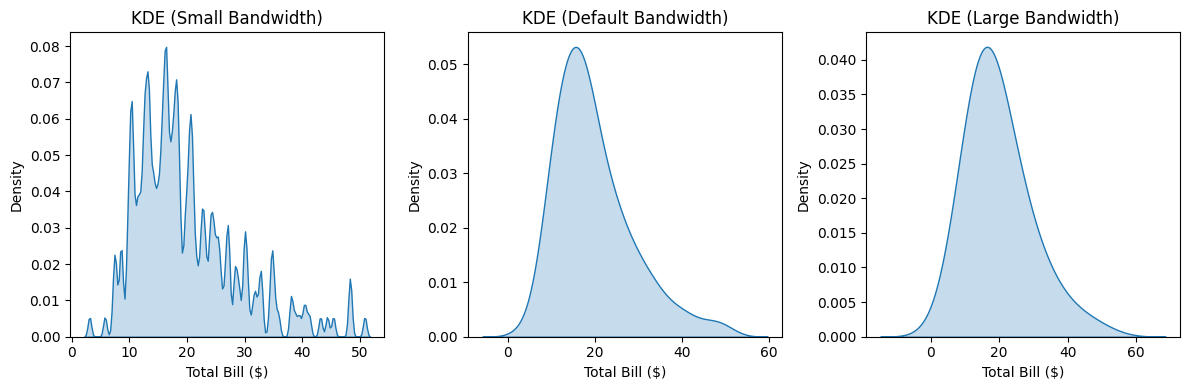

In [9]:
# Effect of Bandwidth on KDE Plots

# KDE with small bandwidth
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.kdeplot(tips['total_bill'], bw_adjust=0.1, fill=True)
plt.title('KDE (Small Bandwidth)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Density')

# KDE with default bandwidth (optimized by Seaborn)
plt.subplot(1, 3, 2)
sns.kdeplot(tips['total_bill'], fill=True)
plt.title('KDE (Default Bandwidth)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Density')

# KDE with large bandwidth
plt.subplot(1, 3, 3)
sns.kdeplot(tips['total_bill'], bw_adjust=2, fill=True)
plt.title('KDE (Large Bandwidth)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Observations:

*   With `bw_adjust=0.1` (small bandwidth), the plot is very bumpy and shows many local peaks, which might be noise.
*   The default bandwidth provides a good balance, revealing the main shape of the distribution.
*   With `bw_adjust=2` (large bandwidth), the plot is very smooth and might hide some nuances or secondary peaks if they existed.

Just like with histograms, finding the right bandwidth is key to an informative KDE plot. `seaborn`'s default `bw_adjust` often does a good job.

KDE plots are particularly useful when comparing distributions across different categories.

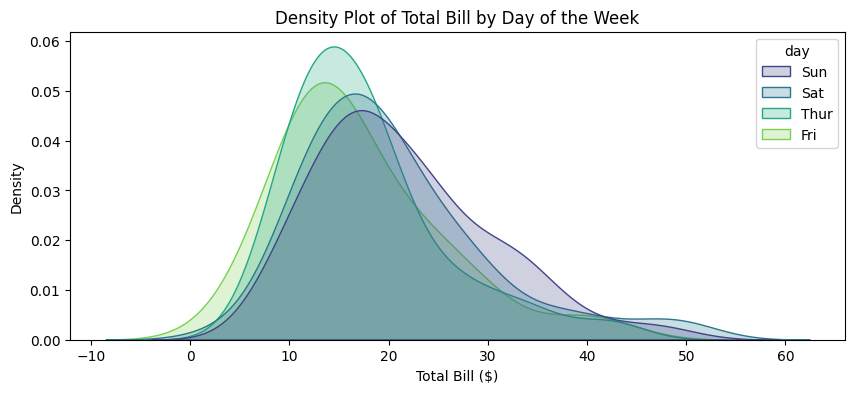

In [28]:
# KDE Plot of 'total_bill' by 'day'
plt.figure(figsize=(10, 4))
sns.kdeplot(data=tips, x='total_bill', hue='day', fill=True, common_norm=False, palette='viridis')
plt.title('Density Plot of Total Bill by Day of the Week')
plt.xlabel('Total Bill ($)')
plt.ylabel('Density')
#plt.legend(title='Day')
plt.show()

Here, `common_norm=False` means that each distribution is normalized independently (area under each curve is 1), making it easier to compare the shapes of the distributions for each day. We can observe how the distribution of `total_bill` changes across different days of the week, with Saturday and Sunday generally having higher bill amounts.

# **4. Box Plots**
**Understanding the Five-Number Summary**

A box plot (also known as a box-and-whisker plot) is a standardized way of displaying the distribution of data based on a five-number summary:

1.  **Minimum (Lower Whisker)**: The smallest data point within 1.5 times the Interquartile Range (IQR) below the first quartile.
2.  **First Quartile (Q1) / 25th Percentile**: 25% of the data falls below this value. It marks the lower end of the box.
3.  **Median (Q2) / 50th Percentile**: The middle value of the dataset, dividing it into two equal halves. It's the line inside the box.
4.  **Third Quartile (Q3) / 75th Percentile**: 75% of the data falls below this value. It marks the upper end of the box.
5.  **Maximum (Upper Whisker**): The largest data point within 1.5 times the IQR above the third quartile.
6.  ***Outliers***: Data points that fall outside the whiskers are plotted individually as points.

**The Interquartile Range (IQR)** is the range between the first and third quartiles *(IQR=Q3−Q1)*. It represents the middle 50% of the data.

**Interpreting Box Plots**

*   **Median**: The central line in the box indicates the median, giving a sense of the central tendency.
*   **Box Length (IQR)**: The length of the box shows the spread of the middle 50% of the data. A longer box means more spread.
*   **Whisker Length**: The whiskers indicate the spread of the remaining data, excluding outliers.
*   **Outliers**: Individual points outside the whiskers highlight extreme values that might warrant further investigation.
*   **Skewness**: The position of the median within the box and the relative lengths of the whiskers can indicate skewness.
     *   If the median is closer to Q1 and the upper whisker is longer, it suggests right-skewness.
     *   If the median is closer to Q3 and the lower whisker is longer, it suggests left-skewness.

Let's create a box plot for `total_bill`.

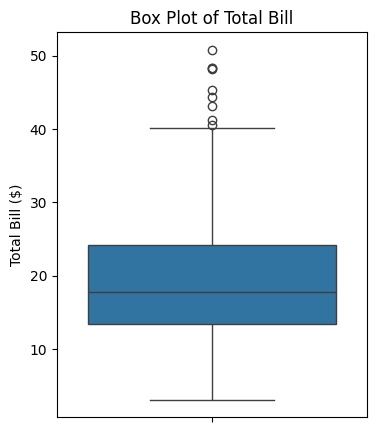

In [11]:
# Box Plot of 'total_bill'
plt.figure(figsize=(4, 5))
sns.boxplot(y=tips['total_bill'])
plt.title('Box Plot of Total Bill')
plt.ylabel('Total Bill ($)')
plt.show()

From this box plot, we can see:

*   The median total_bill is around \$18.
*   The middle 50% of total bills (the box) ranges from about \$13 to \$25.
*   There are several outliers on the higher end, indicating some very large bills.

## **Trends: Using Box Plots to Compare Distributions Across Categories**

Box plots are incredibly powerful for comparing the distributions of a numerical variable across different categories of a categorical variable.

Let's compare the distribution of `total_bill` across different `day`s of the week.

<ipython-input-12-4cfd881444dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



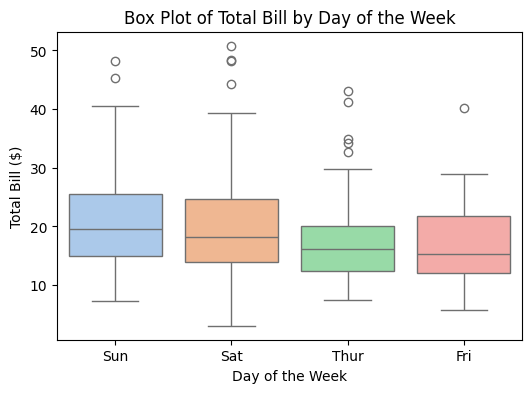

In [12]:
# Box Plot of 'total_bill' by 'day'
plt.figure(figsize=(6, 4))
sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')
plt.title('Box Plot of Total Bill by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill ($)')
plt.show()

We can clearly see differences in the median `total_bill` for each `day`. For instance, Saturday and Sunday generally have higher median bills and more outliers compared to Thursday and Friday.

<ipython-input-13-75c137a63672>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



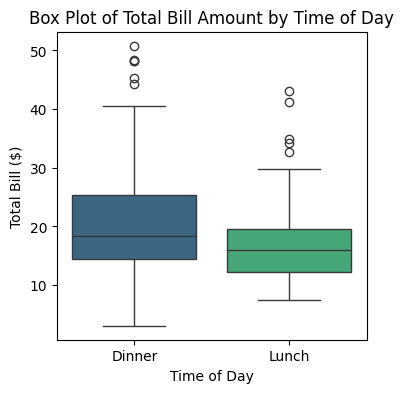

In [13]:
# Box Plot of 'total bill' by 'time' (Lunch vs Dinner)
plt.figure(figsize=(4, 4))
sns.boxplot(x='time', y='total_bill', data=tips, palette='viridis')
plt.title('Box Plot of Total Bill Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Bill ($)')
plt.show()

Total Bill by Time: The median `total bill` amount appears slightly higher for dinner than for lunch, and the spread of `total bill` is also larger during dinner.

# **5. Violin Plots**
**Combining the Strengths of Box Plots and Density Plots**

**Violin plots** are a hybrid visualization that combine the best features of box plots and kernel density plots. They show:

*   The **box plot's summary statistics** (median, quartiles, and potentially outliers) represented by the inner components.
*   The **KDE plot's smoothed distribution shape** (density) represented by the width of the "violin."

This means a violin plot provides a richer understanding of the data's distribution compared to a box plot alone, as it shows not just the summary statistics but also the actual density of data points at different values. This is especially useful for identifying multimodal distributions that a box plot might miss.

**Interpreting Violin Plots**

*   **Width of the violin**: The wider sections of the violin indicate higher probability density (more data points) at those values.
*   **Inner Box/Markers**: Typically, a small box inside shows the IQR, a line indicates the median, and sometimes individual points mark the mean or outliers. The default in seaborn often includes a box plot inside.

Let's create a violin plot for `total_bill` by `day`.

<ipython-input-14-2e624883508b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



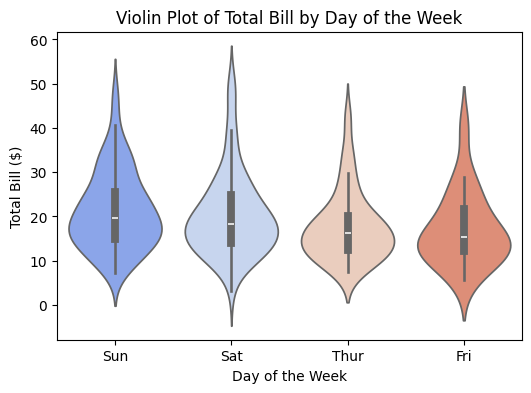

In [14]:
# Violin Plot of 'total_bill' by 'day'
plt.figure(figsize=(6, 4))
sns.violinplot(x='day', y='total_bill', data=tips, palette='coolwarm')
plt.title('Violin Plot of Total Bill by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill ($)')
plt.show()


**Total Bill by Day**: For Thursday, the violin shape is relatively narrow, indicating a concentrated distribution. For Saturday and Sunday, the violins are wider, especially at higher bill amounts, reflecting the broader spread and higher density of larger bills. We can also see the median and IQR within each violin.

<ipython-input-15-40d609387cd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



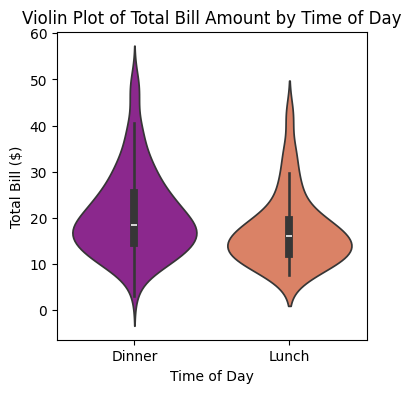

In [15]:
# Violin Plot of 'total bill' by 'time'
plt.figure(figsize=(4, 4))
sns.violinplot(x='time', y='total_bill', data=tips, palette='plasma')
plt.title('Violin Plot of Total Bill Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Bill ($)')
plt.show()

<ipython-input-16-09af45e0ea4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



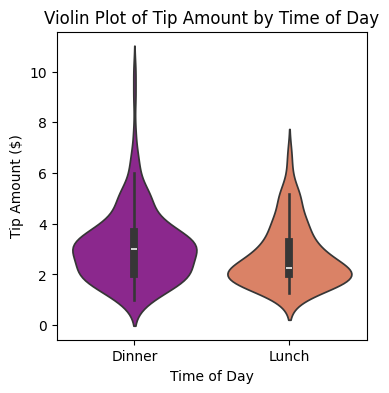

In [16]:
# Violin Plot of 'tip' by 'time'
plt.figure(figsize=(4, 4))
sns.violinplot(x='time', y='tip', data=tips, palette='plasma')
plt.title('Violin Plot of Tip Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Tip Amount ($)')
plt.show()

**Tip by Time**: We clearly see the bimodal nature of tips for dinner (one peak around $2-$3 and another around $4-$5), which might have been less obvious from just a box plot. Lunch tips seem more concentrated around a single lower value.

*Created by [Prachuryya Kaushik](https://www.iitg.ac.in/cse/student-pages/k.prachuryya) under the guidance of [Prof. Ashish Anand](https://www.iitg.ac.in/anand.ashish//)*